
## Data Transfomation ##

__NOTE:__  have ALMA Data set, with a angular spectral 14", that I need resampling to 16" (angular resolution spectral in SOFIA - Y. Okada - )

Resampling spectral resolution is the first step, because it is independent of the spatial axis, it reduces the error to reduce the number of channels and avoid loss of information.

_Is important generate a change of frequency to velocity, previous to resampling_

 __FREQ TO RADIAL VELOCITY__

To convert Frequency to Velocity, in radio astronomy it is necessary to know that, the ALMA data deliver a _Resting Frequency_, which refers to the intrinsic frequency where the spectral line emitted in the emitter reference systems, before some relative motion effect, such as __Doppler effect__ (redshift).

Doppler Effect
$$ v = c (\frac{\lambda_{rest} - \lambda}{\lambda_{rest}})$$

where: 
- $\lambda_{rest}$ : Rest Freq. (Hz)
- $\lambda$ : Freq. (Hz)
- c : Light velocity (km/s)
- v : velocity (km/s)

Python have a equivalencies for this; _using {doopler_radio()}_

**NOTE:
Each axis in the data file contains three parameters to extract: __CRVAL__ ,__CDET__ y__CRPIX__. Do I extract all information about each channel, I applied an extraction format given by: 
$$Y = (X - X_0)m + b$$
$$AX = CRVAL + (i - CRPIX) * CDELT$$

and $i$ is the channel number, in case of frequency is between (1 - 2043)

where: 
- CRVAL: The axis reference value (reference frequency in this case in the first pixel)
- CDELT: The increase in the physical coordinate value between consecutive pixels.
- CRPIX: The index of the reference pixel (index where the reference value is located)
- NAXIS: Total number of channel per axis.


In [2]:
#### Import the diferent libraries to use

from astropy import units as u
from spectral_cube import SpectralCube

#### Charge the data cube
file = '/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/FILES/member.uid___A001_X3621_X1a6a.N159-13CII_sci.spw26.cube.I.pbcor.fits'
cube = SpectralCube.read(file, format = 'fits')
print(cube)

SpectralCube with shape=(2043, 128, 120) and unit=Jy / beam:
 n_x:    120  type_x: RA---SIN  unit_x: deg    range:    84.794668 deg:   85.014927 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:   -69.807597 deg:  -69.726457 deg
 n_s:   2043  type_s: FREQ      unit_s: Hz     range: 102382477059.200 Hz:102631771362.019 Hz


In [ ]:
header = cube.header
print(header)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    3                                                  NAXIS1  =                  120                                                  NAXIS2  =                  128                                                  NAXIS3  =                 2043                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   4.442253420057E-03                                                  BMIN    =   3.226777089219E-03                                                  BPA     =  -8.550686982140E+01                                                  BTYPE   = 'Intensity'                   

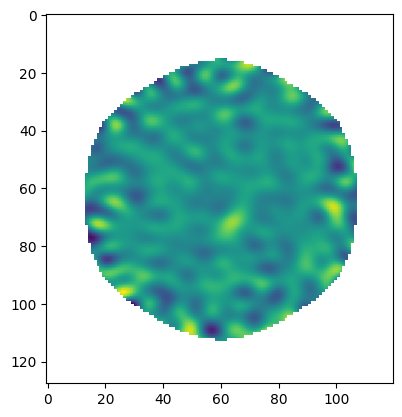

In [19]:
# Flash viewer of spatial emission
cube[1018, :, :].quicklook()

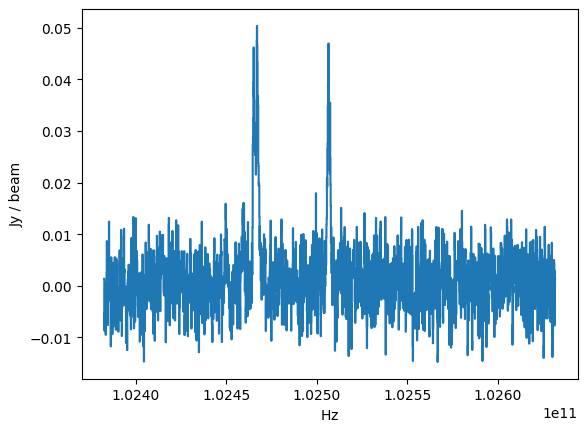

In [14]:
cube[:, 74, 63].quicklook()

In [10]:
#### Extract the Rest Frequency 
rest_freq = header['RESTFRQ'] * u.Hz
print(rest_freq)

102587476000.0 Hz


In [ ]:
#### View frequency values in the cube
freq = header['CRVAL3'] * u.Hz
freq.spectral_axis = cube.spectral_axis
freq.spectral_axis

[1.02382477e+11 1.02382599e+11 1.02382721e+11 ... 1.02631527e+11
 1.02631649e+11 1.02631771e+11] Hz
Hz


<Quantity [1.02382477e+11, 1.02382599e+11, 1.02382721e+11, ...,
           1.02631527e+11, 1.02631649e+11, 1.02631771e+11] Hz>

In [ ]:
##### Convert the frequency axis to velocity axis
# The velocity convention is set to 'radio' and the rest frequency is set to the value extracted from the header.
vcube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=rest_freq)
vcube.spectral_axis

<Quantity [ 599.07055662,  598.71379102,  598.35702542, ..., -128.7312702 ,
           -129.08803581, -129.44480141] km / s>

In [15]:
cubewcs = vcube.wcs
cube_wcs = cube.wcs
print(cube_wcs)
print(cubewcs)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN' 'DEC--SIN' 'FREQ' 
CRVAL : np.float64(84.90387208333) np.float64(-69.76674222222) np.float64(102382477059.2) 
CRPIX : np.float64(61.0) np.float64(65.0) np.float64(1.0) 
PC1_1 PC1_2 PC1_3  : np.float64(1.0) np.float64(0.0) np.float64(0.0) 
PC2_1 PC2_2 PC2_3  : np.float64(0.0) np.float64(1.0) np.float64(0.0) 
PC3_1 PC3_2 PC3_3  : np.float64(0.0) np.float64(0.0) np.float64(1.0) 
CDELT : np.float64(-0.0006388888888889) np.float64(0.0006388888888889) np.float64(122083.4000092) 
NAXIS : 0  0
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN' 'DEC--SIN' 'VRAD' 
CRVAL : np.float64(84.90387208333) np.float64(-69.76674222222) np.float64(599070.5566226173) 
CRPIX : np.float64(61.0) np.float64(65.0) np.float64(1.0) 
PC1_1 PC1_2 PC1_3  : np.float64(1.0) np.float64(0.0) np.float64(0.0) 
PC2_1 PC2_2 PC2_3  : np.float64(0.0) np.float64(1.0) np.float64(0.0) 
PC3_1 PC3_2 PC3_3  : np.float64(0.0) np.float64(0.0) np.float64(1.0) 
CDELT : np.float6

In [22]:
#### Save the cube with the new velocity axis to a new FITS file
vcube.write('cube_with_vel.fits', overwrite=True)
print('The cube with the new velocity axis has been saved as "cube_with_vel.fits".')


The cube with the new velocity axis has been saved as "cube_with_vel.fits".
